In [55]:
import numpy as np
import timeit
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

In [56]:
def create_gbm_minute(init_price, mu, sigma, length):
    """
    Calculates an asset price path using the analytical solution
    to the Geometric Brownian Motion stochastic differential
    equation (SDE).

    Parameters
    ----------
    length : The int number needed to calculate length of the time series.
    init_price: Asset inital price.
    mu: The mean 'drift' of the asset.
    sigma: Volatility expressed annual terms.

    Returns
    -------
    `np.ndarray`
        The asset price path
    """
    n = length
    dt = 1 / (255 * 6.5 * 60) 

    asset_path = np.exp(
        (mu - sigma ** 2 / 2) * dt +
        sigma * np.random.normal(0, np.sqrt(dt), size=n)
    )

    return init_price * asset_path.cumprod()

In [57]:

def Function_runtime(func,*args, **kwargs):
    start = timeit.default_timer()
    result = func(*args, **kwargs)
    
    stop = timeit.default_timer()
    time = stop-start
    return result, time

In [62]:
minutes_length = int(255*6.5*60) 
num_assets = 10000
assets = np.zeros((num_assets,minutes_length))
for i in range(num_assets):
    if(i)%100 == 0:
        print(f"Generating asset path completed {int(i/num_assets*100)}%", end = "\r" )
    assets[i] = create_gbm_minute(100, 0.01, 0.2, minutes_length)
print(f"Generating asset path completed 100%", end = "\r" )

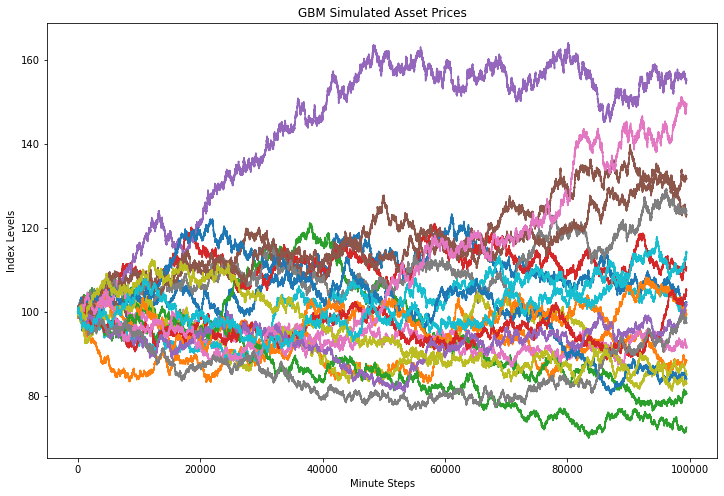

In [63]:
# Plot initial 10 simulated path using matplotlib
fig, axes = plt.subplots(1,1,figsize = (12,8))
for i in range(20):
    axes.plot(assets[i])
# plt.grid(True)
plt.xlabel('Minute Steps')
plt.ylabel('Index Levels')
plt.title('GBM Simulated Asset Prices');
fig.savefig("figures/prices_simulation.jpg",dpi=400)


In [64]:
asset_easy = assets[:100,:]
asset_medium = assets[:1000,:]
asset_hard = assets

In [65]:
easy_runtime = Function_runtime(np.cov, asset_easy)[1]
print(f"100 assets running time: {easy_runtime}")

100 assets running time: 0.08605691699995077


In [66]:
medium_runtime = Function_runtime(np.cov, asset_medium)[1]
print(f"1000 assets running time: {medium_runtime}")

1000 assets running time: 2.062887916999898


In [67]:
hard_runtime = Function_runtime(np.cov, asset_hard)[1]
print(f"10000 assets running time: {hard_runtime}")

10000 assets running time: 149.4889714169999


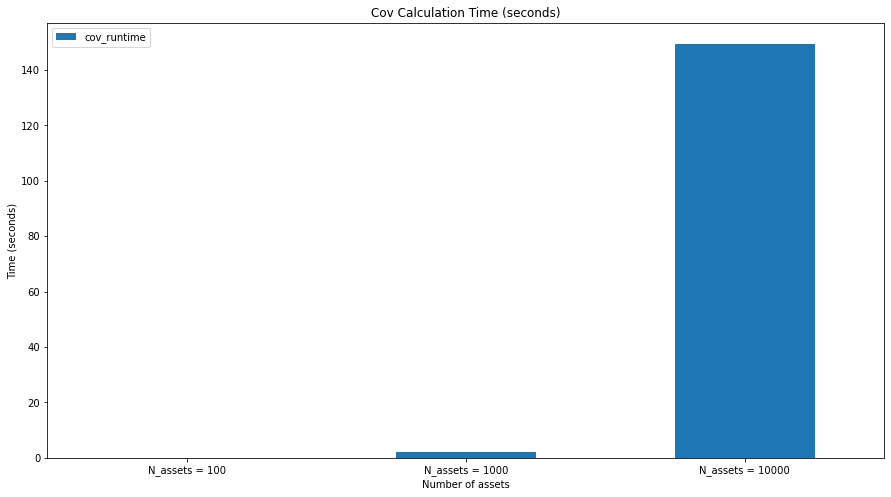

In [68]:
# plot the figures to demonstrate my conclusions
fig, axes = plt.subplots(1,1,figsize = (8,6))
label = ["N_assets = "+str(n) for n in [100,1000,10000]]

Runtime_pd = pd.DataFrame({
    "cov_runtime":[easy_runtime,medium_runtime,hard_runtime],
    },
    index=label)
Runtime_pd.plot.bar(rot = 0,figsize=(15, 8), ax = axes,title = "Cov Calculation Time (seconds)")
axes.set_xlabel('Number of assets')
axes.set_ylabel('Time (seconds)')
fig.savefig("figures/running_time.jpg",dpi=400)

In [69]:
np.around(Runtime_pd,2)

,cov_runtime
N_assets = 100,0.09
N_assets = 1000,2.06
N_assets = 10000,149.49
